<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.955 · Modelos avanzados de minería de datos · PEC1</p>
<p style="margin: 0; text-align:right;">2020-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación

 </p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 1: Preparación de datos

A lo largo de esta práctica veremos como aplicar diferentes tecnicas para la carga y preparación de datos:

 <ol start="1">
  <li>Carga de un conjunto de datos</li>
  <li>Análisis de los datos
  <br>2.1 Análisis estadístico básico
  <br>2.2 Análisis expxloratorio de los datos
  <li>Reducción de la dimensionalidad</li>
  <li>Entrenamiento y test</li>
</ol>
   
Para eso necesitaremos las siguientes librerías:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import validation_curve

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

%matplotlib inline

# 1. Carga del conjunto de datos (1 punto)

En primer lugar, debéis cargar el conjunto de datos "Boston house prices", el cual contiene el valor de las casas en diferentes zonas de Boston dependiendo de múltiples factores. Se puede descargar de internet [aquí](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/) o se puede cargar directamente desde la librería "scikit-learn", que incorpora un conjunto de datasets muy conocidos y usados para la minería de datos y machine learning [http://scikit-learn.org/stable/datasets/index.html](http://scikit-learn.org/stable/datasets/index.html).

Para los ejercicios de esta PEC, utilizaremos como variable respuesta a "MEDV": la mediana del valor de las casas en una zona de Boston (en k$).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Cargad el conjunto de datos "boston house-prices dataset" y mostrad:
<ul>
  <li>el número y nombre de los atributos (variables que podrían ser usadas para predecir la respuesta "MEDV")</li>
  <li>el número de filas del conjunto de datos</li>
  <li>verificad si hay o no "missing values" y en qué columnas</li>
</ul>

<hr>
Sugerencia: Si usáis sklearn (sklearn.datasets.load_boston), explorad las diferents 'keys' del objecto obtenido.<br>
Sugerencia: Igual os resulta útil pasar los datos (atributos + respuesta) a un dataframe de pandas.
</div>

Dataset como pandas dataframe

In [2]:
boston_houseprices = datasets.load_boston()
boston_df = pd.DataFrame(boston_houseprices.data)

boston_df.columns = boston_houseprices.feature_names
boston_df['MEDV'] = boston_houseprices.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Numero y nombres de los atributos

In [3]:
nombre_atributos = boston_df.columns
print(nombre_atributos)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [4]:
num_atr = len(nombre_atributos)

print(f"El numero de atributos es: {num_atr}")

El numero de atributos es: 14


Numero de filas


In [5]:
count_row = boston_df.shape[0]
print(f"El numero de filas es: {count_row}")

El numero de filas es: 506


Missing values

In [6]:
boston_df.isnull().sum()
#no hay valores nulos

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# 2. Análisis de los datos (3 puntos)

## 2.1 Análisis estadístico básico

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realizad un análisis estadístico básico: 
<br>

<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calculad la frecuencia</li>
      <li>Haced un gráfico de barras</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calculad estadísticos descriptivos básicos: media, mediana, desviación estandard, ...</li>
      <li>Haced un histograma de las variables INDUS, AGE y MEDV</li>
    </ul>
</ul>
    
<hr>
Sugerencia: podéis usar la librería 'pandas' y sus funciones 'describe' y 'value_counts', así como las funciones 'bar' e 'hist' de matplotlib.
</div>

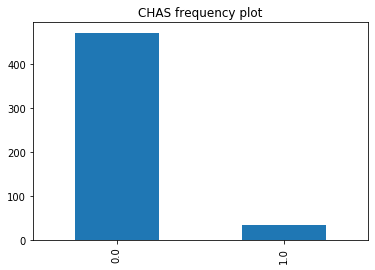

In [7]:
boston_df['CHAS'].value_counts().plot.bar(title = "CHAS frequency plot")
plt.show()

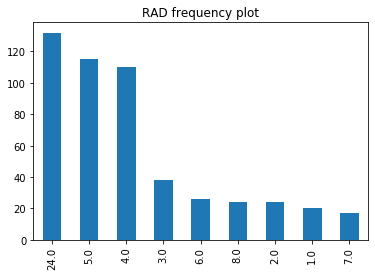

In [8]:
boston_df['RAD'].value_counts().plot.bar(title = "RAD frequency plot")

plt.show()

In [9]:
bosq_df = boston_df[["CRIM", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT"]]


In [10]:
bosq_df.describe()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063
std,8.601545,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000
25%,0.082045,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000
50%,0.256510,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000
75%,3.677083,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000
max,88.976200,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000


In [11]:
bosq_df.median()

CRIM         0.25651
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
dtype: float64

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong><br>
Comentad los resultados.
</div>

Es complicado realizar una comparación entre los resultados, ya que se puede observar en los valores de media y mediana que los valores están comprendidos en rangos dispares. Para poder realizar una comparación de la dispersión de los datos, los percentiles y/o los valores máximos y mínimos para analizar los outliers habría que normalizar los valores. 

In [12]:
x = bosq_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)

df_normalized.rename(columns = {0:'CRIM',1:'INDUS',2:'CHAS',3:'NOX',4:'RM', 5:'AGE', 6:'DIS',7:'TAX',8:'PTRATIO',9:'B',10:'LSTAT'}, inplace = True) 
df_normalized.head()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.000000,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.066794,0.648936,1.000000,0.099338


In [13]:
df_normalized.describe()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.422208,0.622929,0.898568,0.301409
std,0.096679,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.321636,0.230313,0.230205,0.197049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.175573,0.510638,0.945730,0.144040
50%,0.002812,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.272901,0.686170,0.986232,0.265728
75%,0.041258,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,0.914122,0.808511,0.998298,0.420116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df_normalized.median()

CRIM       0.002812
INDUS      0.338343
CHAS       0.000000
NOX        0.314815
RM         0.507281
AGE        0.768280
DIS        0.188949
TAX        0.272901
PTRATIO    0.686170
B          0.986232
LSTAT      0.265728
dtype: float64

Desviación estandard: Se observa que la dispersión de los datos es homogénea, ya que deja a todos las variables con el mismo número de cifras significativas. 

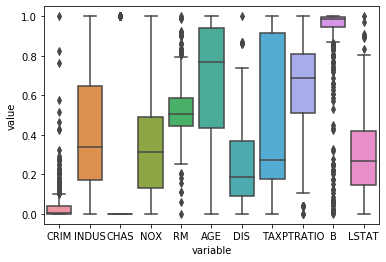

In [15]:
sns.boxplot(x="variable", y="value", data=pd.melt(df_normalized))
plt.show()

Hay que realizar un análisis inferencial para poder entender el papel de los outliers que se pueden observar en el análisis preliminar de los boxplots. Se observa que los datos con más outliers tienen una desviación significativa entre la media y la mediana. 

variables: 

CRIM: per capita crime rate by town

La media de crimenes en la ciudad de boston no está uniformemente distribuida. Hay que acotarla mediante subsectores. 


RM: average number of rooms per dwelling

Se observa una distribución heterogenea del núnmero de habitaciones por vivienda en la ciudad. 


B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 

En este caso, la media y la mediana son próximas entre si, y eso nos dice que la mayoria de valores se encuentran entre 0,9 y 1. Se observa que existen muchos puntos outliers distribuidos en todo el rango de valores. El valor de B es directamente proporcional a Bk, que es la proporción de personas negras por barrio. Bk está elevado al cuadrado, lo que hace que aumente su significancia en el impacto sobre el valor final de B, y . Las proporciones iguales a 0,63 darán valores de 0. Los valores de Bk entre 1 y 0,63 son aquellos que representan proporciones altas de personas negras. El impacto más alto en B de una población de personas negras puede ser 1000*(1-0,63)^2 = 1300. En cambio, una población de personas mayoritariamente no negras será 1000*(0-0,63)^2 = 3969.

Una media alta indica una proporción elevada de personas blancas, pero una distribución uniforme de outliers indica que la presencia de población de personas negras está segregada. 


## 2.2 Análisis exploratorio de los datos

En este ejercicio exploraremos la relación de los atributos con la variable respuesta, mediante gráficos y analizando las correlaciones de los atributos numéricos.

In [16]:
response = "MEDV"
cat_feat = "CHAS"
num_feats = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
print('Respuesta ("target"):', response)
print("Atributo categórico:", cat_feat)
print("Atributos numéricos:", num_feats)

Respuesta ("target"): MEDV
Atributo categórico: CHAS
Atributos numéricos: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realizad un gráfico del histograma de valores de la variable respuesta, separado por los posibles valores (clases) del atributo categórico. Para comparar mejor los valores de MEDV para las diferentes clases de CHAS, los histogramas del gráfico tienen que estar sobrepuestos. Añadid una leyenda para saber a qué clase corresponde cada histograma.
    
La finalidad es observar como se distribuye el valor de la respuesta MEDV en función del valor de la clase CHAS, para poder identificar de manera visual y rápida si este atributo categórico está relacionado con diferentes valores de la respuesta.
    
<hr>
Sugerencia: podéis usar la función "hist" de la librería "matplotlib", así como su parámetro "alpha" para que se aprecien los histogramas sobrepuestos.<br>
Sugerencia: para comparar mejor los histogramas, considerad representar la densidad de probabilidad en vez del número de entradas por bin. De este modo, la escala de los histogramas será la misma para cada clase y será fácil de comparar. Podéis usar el parámetro "density" de la misma función "hist".  
</div>

In [17]:
boston_df['MEDV'] = boston_houseprices.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


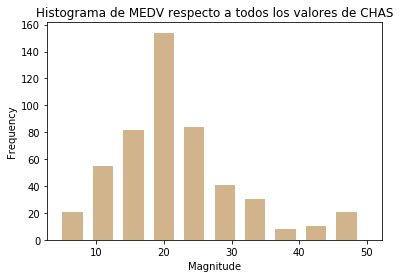

In [18]:
medv = boston_df["MEDV"]
plt.hist(medv, alpha = 1, width = 3, color = "tan")
plt.title("Histograma de MEDV respecto a todos los valores de CHAS")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

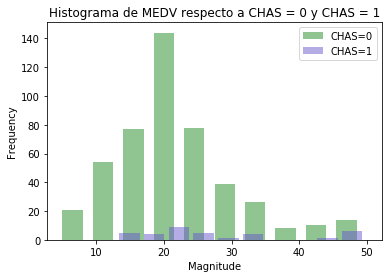

In [19]:
condition_0 = (boston_df["CHAS"] == 0)
condition_1 = (boston_df["CHAS"] == 1)
bos_chas_0 = boston_df[condition_0]
bos_chas_1 = boston_df[condition_1]

chas_0 = bos_chas_0["MEDV"]
chas_1 = bos_chas_1["MEDV"]


plt.hist(chas_0, alpha = 0.5, width = 3, color = "forestgreen")
plt.hist(chas_1, alpha = 0.5, width = 3, color = "slateblue")
plt.title("Histograma de MEDV respecto a CHAS = 0 y CHAS = 1")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.legend(['CHAS=0','CHAS=1'])
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los histogramas, ¿te parece que el atributo CHAS tendrá algún peso a la hora de predecir la mediana del precio de las casas, MEDV? ¿Porqué? 
</div>

La frecuencia de la variable MEDV cuando CHAS = 0 tienes significativamente más ocurrencia que cuando CHAS = 1. La variable CHAS describe si la vivienda se encuentra limítrofe con el rio Charles. Si CHAS=0, la vivienda limita con el rio. En el análisis preliminar se puede observar que la vivienda limite con el rio es muy probable que tenga peso a la hora de predecir el precio de una nueva vivienda. 

Al observar la distribución de los datos MEDV vs CHAS=0, es claro que este parámetro influirá en la mediana del precio de las casas, ya que en el aprendizaje del algoritmo la mayoria de precios se encuentran entre 15 y 25. 



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repetid los histogramas anteriores, añadiendo una línea vertical indicando la media de cada uno de los histogramas. Pintad las linias del mismo color que el histograma para que quede claro a cual hacen referencia. Añadid a la leyenda la clase de CHAS y los valores de la media y la desviación estandard en cuestión. La finalidad es verificar numéricamente las diferencias identificadas anteriormente de forma visual.
    
<hr>
Sugerencia: podeis usar "axvline", de matplotlib axis, para las linias verticales.
</div>

22.532806324110698


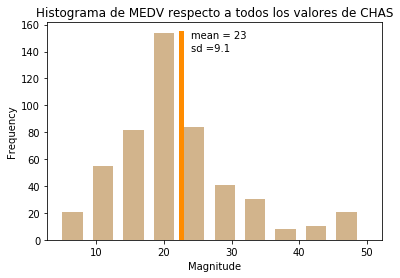

In [20]:
plt.hist(medv, alpha = 1, width = 3, color = "tan")

mean_medv = boston_df["MEDV"].mean()
print(mean_medv)
plt.axvline(x = mean_medv, ymin = 0, ymax = 0.95, 
            linewidth = 5, color ='darkorange') 
plt.text(24, 150,'mean = 23')
plt.text(24, 140, 'sd =9.1 ')
plt.title("Histograma de MEDV respecto a todos los valores de CHAS")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

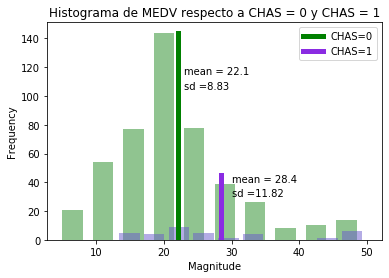

In [21]:
mean_0 = round(bos_chas_0["MEDV"].mean(), 1)
mean_1 = round(bos_chas_1["MEDV"].mean(), 1)

sd_0 = round(bos_chas_0["MEDV"].std(), 2)
sd_1 = round(bos_chas_1["MEDV"].std(), 2)


plt.hist(chas_0, alpha = 0.5, width = 3, color = "forestgreen")
plt.hist(chas_1, alpha = 0.5, width = 3, color = "slateblue")
plt.axvline(x = mean_0, ymin = 0, ymax = 0.95, 
            linewidth = 5, color ='green') 
plt.axvline(x = mean_1, ymin = 0, ymax = 0.3, 
            linewidth = 5, color ='blueviolet') 

plt.text(23, 115,f'mean = {mean_0}')
plt.text(23, 105, f'sd ={sd_0}')

plt.text(30, 40,f'mean = {mean_1}')
plt.text(30, 30, f'sd ={sd_1}')

plt.title("Histograma de MEDV respecto a CHAS = 0 y CHAS = 1")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.legend(['CHAS=0','CHAS=1'])
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calculad y mostrad la correlación entre todos los atributos numéricos y la respuesta.
</div>

La cuantificación de la fuerza de la relación lineal entre dos variables cuantitativas, se estudia por medio del cálculo del coeficiente de correlación de Pearson. Dicho coeficiente oscila entre –1 y +1. Un valor de –1 indica una relación lineal o línea recta positiva perfecta. Una correlación próxima a cero indica que no hay relación lineal entre las dos variables.

El realizar la representación gráfica de los datos para demostrar la relación entre el valor del coeficiente de correlación y la forma de la gráfica es fundamental ya que existen relaciones no lineales.

El coeficiente de correlación posee las siguientes características:

-El valor del coeficiente de correlación es independiente de cualquier unidad usada para medir las variables.

-El valor del coeficiente de correlación se altera de forma importante ante la presencia de un valor extremo, como sucede con la desviación típica. Ante estas situaciones conviene realizar una transformación de datos que cambia la escala de medición y modera el efecto de valores extremos (como la transformación logarítmica).

-El coeficiente de correlación mide solo la relación con una línea recta. Dos variables pueden tener una relación curvilínea fuerte, a pesar de que su correlación sea pequeña. 

-El coeficiente de correlación no se debe extrapolar más allá del rango de valores observado de las variables a estudio ya que la relación existente entre X e Y puede cambiar fuera de dicho rango.

La correlación no implica causalidad. La causalidad es un juicio de valor que requiere más información que un simple valor cuantitativo de un coeficiente de correlación.

In [22]:
x = boston_df.values #returns a numpy arraymin_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_boston_norm = pd.DataFrame(x_scaled)

df_boston_norm.rename(columns = {0:'CRIM',1:'ZN',2:'INDUS', 3:'CHAS',4:'NOX',5:'RM', 6:'AGE', 7:'DIS',8:'RAS',9:'TAX',10:'PTRATIO',11:'B',12:'LSTAT', 13:'MEDV'}, inplace = True) 
df_boston_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


In [23]:
corr = df_boston_norm.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAS,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.2,0.41,-0.056,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.056,-0.043,0.063,1,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18
NOX,0.42,-0.52,0.76,0.091,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.091,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.087,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAS,0.63,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Identificad los 2 atributos que tienen una correlación más fuerte con la respuesta y los 2 con una correlación más débil (coeficiente de correlación mayor o menor en valor absoluto).
    
Para observar y analizar las correlaciones gráficamente, representad, para cada uno de los 4 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, en cada gráfico añadid la representación de una regresión lineal que fite los puntos.
        
<hr>Sugerencia: podéis usar la función "regplot" de la librería 'seaborn'.
</div>

Los dos atributos con mayor correlación son: LSTAT y RM

Los dos atributos con menor correlación son: B y DIS

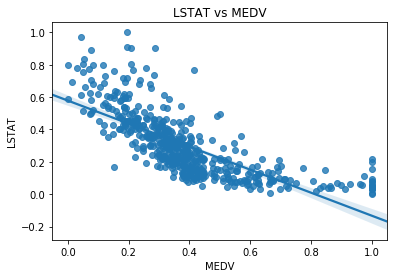

In [24]:
medv = df_boston_norm["MEDV"]
lstat = df_normalized["LSTAT"]

sns.regplot(x = medv,  
            y = lstat,  
            data = df_boston_norm)
plt.title("LSTAT vs MEDV")
plt.show()

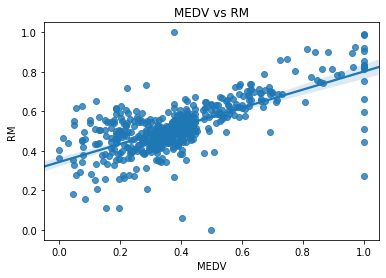

In [25]:
medv = df_boston_norm["MEDV"]
rm = df_normalized["RM"]

sns.regplot(x = medv,  
            y = rm,  
            data = df_boston_norm)
plt.title("MEDV vs RM")
plt.show()

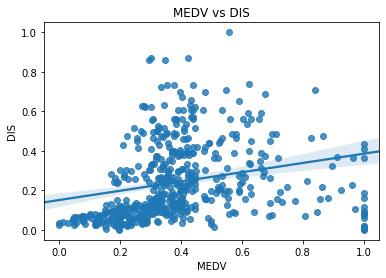

In [26]:
medv = df_boston_norm["MEDV"]
dis = df_normalized["DIS"]

sns.regplot(x = medv,  
            y = dis,  
            data = df_boston_norm)
plt.title("MEDV vs DIS")
plt.show()

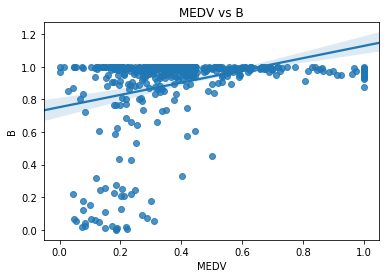

In [27]:
medv = df_boston_norm["MEDV"]
b = df_normalized["B"]

sns.regplot(x = medv,  
            y = b,  
            data = df_boston_norm)
plt.title("MEDV vs B")
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los gráficos, comentad brevemente si conseguís ver las altas o bajas correlaciones que habíais identificado numéricamente.
</div>

Se observa que los valores numéricos de la correlación coinciden con las representaciones gráficas. Es probable, que despues de realizar una limpieza de datos y un tratamientos de los datos outliers se pueda encontrar una mayor correlación, que se traduzca en un aumento numérico y una representación gráfica más representativa. 

# 3. Reducción de la dimensionalidad (2 puntos)

En este ejercicio se aplicarán métodos de reducción de la dimensionalidad al conjunto original de datos. El objetivo es reducir el conjunto de atributos a un nuevo conjunto con menos dimensiones, pero que contengan la máxima información posible presente en los atributos originales.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplicad el método de reducción de la dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Generad un gráfico con el resultado del PCA en el que se muestre, en función de los valores de las dos componentes en los ejes x e y, el valor de la respuesta MEDV usando la escala de colores. El objetivo es visualizar la variación de MEDV en función de los valores de las componentes principales generadas.</li>
</ul>
    
NOTA: Vigilad de no incluir la variable objetivo "MEDV" en la reducción de dimensionalidad. Queremos poder explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: no es necesario que programéis el algoritmo de PCA, podéis usar la implementación disponible en la librería de "scikit-learn".<br>
Sugerencia: para el gráfico, podéis usar el scatter plot de matplotlib con el parámetro "c", que indica el color de los puntos, igual a la variable objetivo.
</div>

Para realizar una reducción de la dimensionalidad con éxito es necesario: 
    
1) Escalar el dataframe de interés

2) Calcular la matriz de covarianza. La matriz de covarianza se calcula para ver qué variables tienen una fuerte dependencia entre si. Una covarianza positiva indica una proporcionalidad directa, mientras que una covarianza negativa indica una proporcionalidad inversa. 

3)Calcular los vectores propios y valores propios (eigenvectors y eigenvalues). Los vectores propios con aquellos vectores que después de sufrir una transformación lineal no sufren cambio en la dirección. Los valores propios son los módulos de los vectores propios. 

Estos valores son los que son computados por la matriz de covarianza para determinar los componentes principales del dataset.

4) Ordenar los vectores y valores propios en orden descendente, donde el vector propio con mayor valor propio es el mñas significativo y representan el primer componente principal (PC1). El segundo componente principal (PC2) será el siguiente con el valor propio mayor, y asi sucesivamente.

5) Reducir la dimensionalidad del dataset. 

In [28]:
boston_pca_df = boston_df.drop('MEDV', 1)
len(boston_pca_df.columns)

13

In [29]:
scaler = preprocessing.StandardScaler()
scaler.fit(boston_pca_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
boston_pca_df_scaled = scaler.transform(boston_pca_df)
pca = PCA(n_components=2)


pca.fit(boston_pca_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
import time 

time_start = time.time()
reduced_pca = pca.transform(boston_pca_df_scaled)
print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

reduced_pca.shape #df reducido a 2 dimensiones

PCA done! Time elapsed: 0.00043082237243652344 seconds


(506, 2)

In [32]:
boston_pca_df_scaled.shape

(506, 13)

In [33]:
principalDf = pd.DataFrame(data= reduced_pca, columns = ['PC1', 'PC2'])


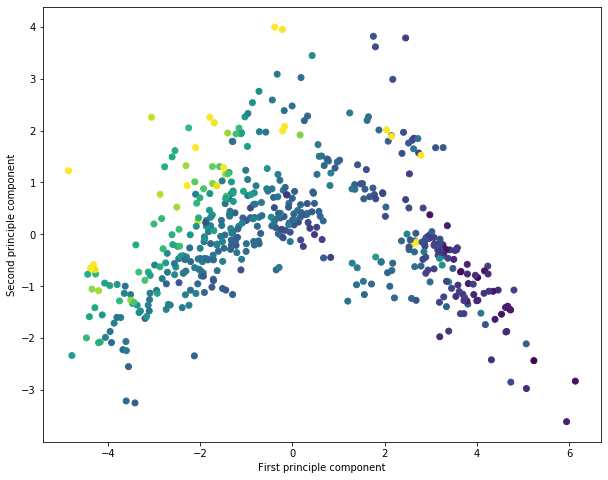

In [34]:
plt.figure(figsize=(10, 8))
plt.scatter(reduced_pca[:,0], reduced_pca[:,1], c=boston_df["MEDV"])
plt.xlabel("First principle component")
plt.ylabel("Second principle component")

plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Repetid la reducción de dimensionalidad, pero en este caso usando TSNE.  Podéis encontrar más información sobre este algoritmo en el link: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Igual que antes, generad un gráfico con el resultado del TSNE en el que se muestre, en función de los valores de las 2 nuevas dimensiones en los ejes x e y, el valor de la respuesta MEDV usando una escala de colores.</li>
</ul>

<hr>
Sugerencia: no es necesario que programéis el algoritmo TSNE, podéis usar la implementación disponible en la librería de "scikit-learn".<br>
Sugerencia: a parte de especificar el número de componentes, probad de usar el parámetro "perplexity".<br>
Sugerencia: para el gráfico, podéis usar el scatter plot de matplotlib con el parámetro "c", que indica el color de los puntos, igual a la variable objetivo.
</div>

In [35]:
df_subset = boston_pca_df_scaled.copy()

time_start = time.time()
tsne = TSNE(n_components=2, perplexity=30, n_iter=5000)
tsne_results = tsne.fit_transform(df_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 4.71972393989563 seconds


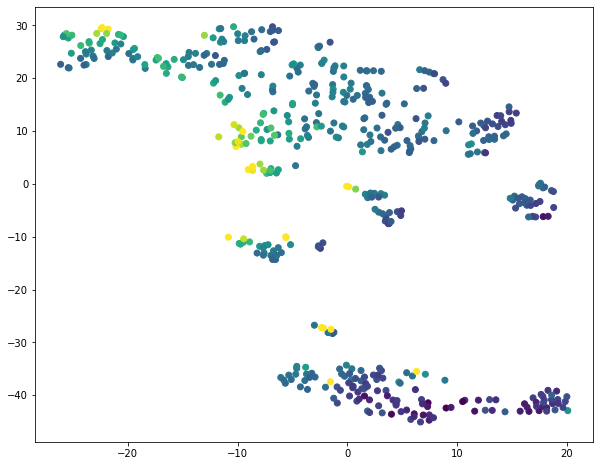

In [36]:
plt.figure(figsize=(10,8))

plt.scatter(tsne_results[:,0], tsne_results[:,1], c=boston_df["MEDV"])
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿creéis que ha funcionado bien la reducción de dimensionalidad? ¿Os parece que las 2 nuevas dimensiones consiguen explicar la variación de MEDV y visualizar diferenciadamente precios caros y baratos? ¿Si utilizásemos las 2 nuevas variables para predecir MEDV, con cuál de los dos métodos de reducción de dimensionalidad creéis que obtendríamos los mejores resultados?
    
¿Por qué obtenemos resultados tan diferentes con los dos métodos?
</div>

Creo que la reducción de la dimensionalidad no ha logrado crear 2 dimensiones significativamente diferentes como para poder obtener resultados y predicciones de calidad en el modelo. Por ello, creo que es muy difícil observar la correlación entre el precio de las viviendas y el resto de variables, ya que a priori no parece haber ninguna variable con el peso suficiente en 2 dimensiones. 

Es difícil saber con qué metodo obtendríamos mejores resultados, ya que parten de bases matemáticas algo distintas. Si hay que decantarse por uno, yo usaría el PCA ya que el coste computacional es menor (menor tiempo de computación) y no depende de setear previamente un argumento de la función como perplexity, que permite decirle al algoritmo previamente el numero de posibles vecinos cercanos de cada punto. Esto último confiere a los resultados de una variabilidad difícil de evaluar. 

Los resultados diferentes se deben a la naturaleza matemática de los dos algoritmos. Uno de ellos utiliza la matriz de convarianzas para dar peso a las variables que más influyan para con la variable target, mientras que tSNE es un algoritmo no lineal que se encarga de encontrar una representación gráfica en 2D del espacio n-dimensional de partida. Para ello emplea diferentes transformaciones en difernetes regiones del espacio n-dimensional, y estas transformaciones cambiar por cada vez que se modifica el numero de iteraciones y/o la perplejidad. 

Por ser más intuitivo y con un coste computacional menor, yo me decantaría primero por usar PCA, y en segundo lugar (y solo si fuese necesario) explorar el problema mediante tSNE. 

# 4. Entrenamiento y test (4 puntos)

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Random Forest para regresión, para predecir la mediana del precio de cada zona y evaluar la precisión obtenida con el modelo. Para eso usaremos:
<ul>
    <li>El conjunto de datos original con todos los atributos</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con PCA</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con TSNE</li>
</ul>
<br>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Dividid el dataset en train y test.</li>
    <li>Definid un modelo Random Forest (fijando n_estimators=10 para mantener el modelo simple).</li>
    <li>Aplicad validación cruzada con el modelo definido y el dataset de train (con cv=5 ya es suficiente).</li>
    <li>Como métrica para cuantificar el error del modelo, utilizad tanto R2 (coeficiente de determinación) como MAE (la media del error absoluto) separadamente</li>
    <li>Calculad la media y la desviación standard del error obtenido en cada caso.</li>
</ul>
    
<hr>
Sugerencia: para separar entre train y test podéis usar 'train_test_split' de sklearn.<br>
Sugerencia: para entrenar un modelo random forest podéis usar 'RandomForestRegressor' de sklearn.<br>
Sugerencia: para aplicar validación cruzada podéis usar 'cross_val_score' de sklearn, y modificar su parámetro 'scoring' si fuese necesario.<br>
</div>

In [37]:
from sklearn import metrics

X = boston_df.iloc[:, 0:4].values
y = boston_df.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.030957721330956613
Mean Squared Error: 0.0034505361001467417
Root Mean Squared Error: 0.05874126403259247


VALIDACIÓN CRUZADA


In [38]:
from sklearn import svm

regression = svm.SVR(kernel='linear', C=1).fit(X_train, y_train)
reg_score = regression.score(X_test, y_test)

clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(regression, X_test, y_test)

print("La puntuación es de: ", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

La puntuación es de:  [0.50864817 0.44983504 0.64919988]
Accuracy: 0.54 (+/- 0.17)


/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


La puntuación obtenida por la validación cruzada se encuentra en el rango de 0 a 1, siendo l la máxima efectividad del modelo. En este caso, el modelo de entrenamiento usado es un árbol de regresión. Un árbol de regresión es a priori una buena elección como algoritmo de entrenamiento, ya que tenemos muchas variables que pueden estar relacionadas entre ellas de diferentes maneras, y un árbol de decisión puede ayudar a clasificar las variables e identificar cuáles afectan más significativamente a la varible de interés, en este caso el precio. 

Se observa que usando un modelo de regresión basado en un árbol de decisión (regression tree) para el dataset de boston housepricing no se consiguen muy buenas predicciones, ya que la puntuación de crossvalidation es de 0,54. Este modelo es un buen análisis preliminar, pero no será el que sea utilizado para obtener las mejores predicciones. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repetid el mismo procedimiento que en el ejercicio anterior con el dataset reducido a 2 dimensiones con PCA.
</div>

In [39]:
X_pca = principalDf.iloc[:, 0:4].values
y_pca = principalDf.iloc[:, 1].values

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=0)

sc = preprocessing.StandardScaler()
X_train_pca = sc.fit_transform(X_train_pca)
X_test_pca = sc.transform(X_test_pca)


regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train_pca, y_train_pca)
y_pred_pca = regressor.predict(X_test_pca)

In [40]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_pca, y_pred_pca))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_pca, y_pred_pca))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_pca, y_pred_pca)))

Mean Absolute Error: 0.01947280056258209
Mean Squared Error: 0.004616632370201989
Root Mean Squared Error: 0.06794580465490116


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repetid el mismo procedimiento que en el ejercicio anterior con el dataset reducido a 2 dimensiones con TSNE.
</div>

In [41]:
tsne_results_df = pd.DataFrame(data= tsne_results, columns = ['tSNE1', 'tSNE2'])
tsne_results_df.head()

,tSNE1,tSNE2
0,-4.591440,7.117125
1,-3.901007,12.303040
2,-7.918499,11.554144
3,-7.627085,13.340219
4,-7.683889,13.154072


In [42]:
X_tsne = tsne_results_df.iloc[:, 0:4].values
y_tsne = tsne_results_df.iloc[:, 1].values

X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_tsne, y_tsne, test_size=0.2, random_state=0)

sc = preprocessing.StandardScaler()
X_train_tsne = sc.fit_transform(X_train_tsne)
X_test_tsne = sc.transform(X_test_tsne)

regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train_pca, y_train_tsne)
y_pred_tsne = regressor.predict(X_test_tsne)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_tsne, y_pred_tsne))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_tsne, y_pred_tsne))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_tsne, y_pred_tsne)))

Mean Absolute Error: 21.664572928524485
Mean Squared Error: 773.8243687229293
Root Mean Squared Error: 27.81769883946063


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Con qué datos ha funcionado mejor? ¿Tiene sentido? ¿Cuadra con los resultados que hemos visto en el ejercicio 3?
</div>

Usando un modelo de regression tree, se ve que los datos que más error han generado son los generados por el tSNE, seguidos por los datos reducidos por PCA y, por último, los datos originales. Con estos resultados, primero habría que descartar los datos obtenidos con tSNE. 

Entre las otras dos posibilidades, hay que evaluar la significancia en la diferencia de los errores. Comparando los resultados de la validación cruzada de ambos modelos, se observa que el subset reducido por PCA presenta una puntuación de CV mayor que la del set original. La puntuación obtenida es de 1 con una sd = 0. 

Al aplicar una reducción de la dimensionalidad de 2 componentes mediante PCA, estamos obteniendo dos vectores en 2 dimensiones que representan las variables con más peso del dataset original mediante el análsis de la matriz de covarianza. Aplicar una CV en un resultado de PCA es muy útil para evaluar el número de componentes más óptimo al aplicar una reducción de la dimensionalidad a un dataset, pero quizá no sirva de mucho para evaluar la eficacia en la predicción del modelo de regresión. 

En este link (http://alexhwilliams.info/itsneuronalblog/2018/02/26/crossval/) se explica muy bien la naturaleza del algoritmo de CV, sus limitaciones y cómo es útil para determinar el numero de componentes de la reducción de la dimensionalidad. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Con el mejor modelo que hayáis obtenido:
    
<ul>
  <li>Generad predicciones sobre el dataset de test.</li>
  <li>Calculad la precisión de las predicciones obtenidas (R2 y MAE).</li>
</ul>
 
<hr>
Sugerencia: para calcular R2 y MAE podéis usar las funciones dentro del módulo "metrics" de sklearn.
</div>

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) #MAE
print('Coefficient of determination:', metrics.r2_score(y_test, y_pred)) #R2

Mean Absolute Error: 0.030957721330956613
Coefficient of determination: 0.7538496779101119


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (R2 o MAE) utilizaríais para explicar lo bueno que es el modelo a un ejecutivo de una inmobiliaria? ¿Y para explicarlo a un analista matemático de la misma compañía? Por qué?  
</div>

R^2:

Representa la proporción de varianza (de y) que ha sido explicada por las variables independientes en el modelo. Proporciona una indicación de bondad de ajuste y, por lo tanto, una medida de qué tan bien es probable que el modelo prediga las muestras invisibles, a través de la proporción de varianza explicada.

MAE:

MAE es la medida de los errores entre observaciones emparejadas que expresan el mismo fenomeno. Algunos ejemplos son comparación entre resultado predicho y observado o resultados de una técnica de medida vs otra técnica. Cuanto menor es MAE, mayor es la bondad de predicción del modelo. 


Yo eligiría R^2 para explicárselo al ejecutivo, ya que puede ser una medida más intuitiva y fácil de interpretar de la calidad de un modelo. Utilizaría una herramienta visual y haría una comparativa con algún ejemplo que le resulte más cotidiano. 

Utilizaría MAE para hablar con el analista matemático, ya que el error absoluto es una medida que permite evaluar el modelo utilizado.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
El modelo random forest depende de muchos parámetros. En este ejercicio sólo hemos especificado el número de árboles (n_estimators) y hemos dejado que usara el resto de parámetros por defecto. Dos parámetros muy útiles en los random forest (y en cualquier modelo que use árboles) son el max_depth y el min_samples_split. Estos parámetros ayudan a controlar el overfitting.
    
Entrenad los modelos anteriores usando diferentes combinaciones de los parámetros:<ul>
  <li>n_estimators</li>
  <li>max_depth</li>
  <li>min_samples_split</li>
</ul>
con el objetivo de encontrar la combinación de parámetros que da los mejores resultados en el conjunto de datos de entrenamiento.

Para el modelo con la mejor combinación de parámetros, calculad las métricas de error (R2 y MAE) en el conjunto de datos de test.
</div>

Random forest regressor:

n_estimators: The number of trees in the forest.

max_depth: The maximum depth of the tree. 

min_samples_split: The minimum number of samples required to split an internal node

Valor mínimo de MAE: 0.028077777777777785 



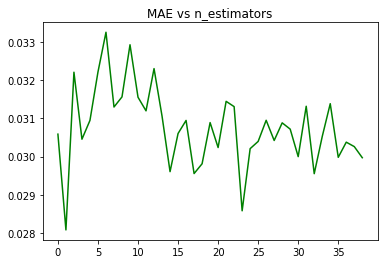

In [44]:
estimators = list(range(2,41))
MAE_list = []
r2_list = []

for estimator in estimators: 
    regressor = RandomForestRegressor(n_estimators=estimator)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    MAE = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    
    MAE_list.append(MAE)
    r2_list.append(r2)
    
print("Valor mínimo de MAE:", min(MAE_list), "\n")
plt.plot(MAE_list, c = "green")
plt.title("MAE vs n_estimators")
plt.show()

Valor máximo de r^2: 0.7988305296328716


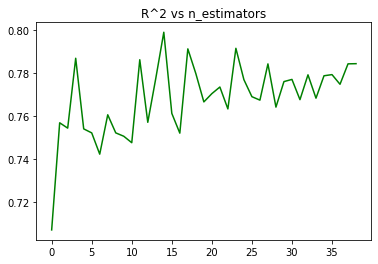

In [45]:
print("Valor máximo de r^2:", max(r2_list))
plt.plot(r2_list, c = "green")
plt.title("R^2 vs n_estimators")
plt.show()

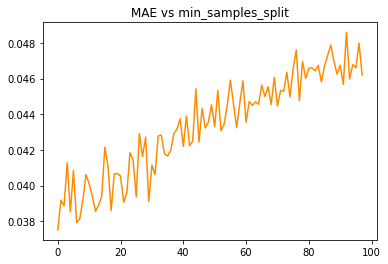

In [46]:
splits = list(range(2,100))

mae_split = []
r2_split = []

for split in splits: 
    regressor = RandomForestRegressor(n_estimators=6, max_depth= 5, min_samples_split=split)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
   
    mae_sp = metrics.mean_absolute_error(y_test, y_pred)
    r2_sp = metrics.r2_score(y_test, y_pred)
   
    mae_split.append(mae_sp)
    r2_split.append(r2_sp)
    

plt.plot(mae_split, c = "darkorange")
plt.title("MAE vs min_samples_split")
plt.show()

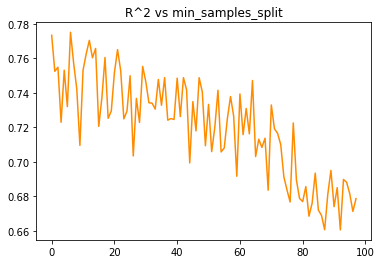

In [47]:
plt.plot(r2_split, c = "darkorange")
plt.title("R^2 vs min_samples_split")
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Habéis conseguido mejorar el modelo? ¿Cuál ha sido el impacto de variar cada parámetro en la precisión del modelo?  
</div>

In [48]:
regressor = RandomForestRegressor(n_estimators=6, max_depth= 5, min_samples_split=18)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) #MAE
print('Coefficient of determination:', metrics.r2_score(y_test, y_pred)) #R2

Mean Absolute Error: 0.03963635276203037
Coefficient of determination: 0.7505154641105302
